In [73]:
"""creating a model to predict if its dip or peak"""
#importing all major libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

Getting the dataset

In [74]:
dip_peak=pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv")

Inspecting dataset

In [75]:
dip_peak.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [76]:
dip_peak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [77]:
print(dip_peak.describe())
dip_peak.columns


                  V1             V2             V3             V4  \
count    1212.000000    1212.000000    1212.000000    1212.000000   
mean     8169.091881    8144.306262    8192.653738    8176.868738   
std     17974.950461   17881.049734   18087.938901   17991.903982   
min         0.920000       0.900000       0.850000       0.890000   
25%        19.602500      19.595000      18.925000      19.277500   
50%       301.425000     295.205000     297.260000     299.720000   
75%      5358.795000    5417.847500    5393.367500    5388.482500   
max    117807.870000  108896.480000  119031.350000  110212.590000   

                  V5             V6             V7             V8  \
count    1212.000000    1212.000000    1212.000000    1212.000000   
mean     8128.297211    8173.030008    8188.582748    8183.641543   
std     17846.757963   17927.114105   18029.562695   18048.582159   
min         0.880000       0.860000       0.870000       0.650000   
25%        19.210000      19.5825

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

printing all the columns for ease to write afterwards

In [78]:
print(dip_peak.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']


checking values of dependant variable and total count

In [79]:
dip_peak['Class'].value_counts()

,count
Class,
0,606
1,606


In [80]:
dip_peak.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


creating X and Y variables

In [81]:
out=dip_peak['Class']
inp=dip_peak.drop(['Class'],axis=1)

In [82]:
inp.shape

(1212, 100)

In [83]:
out.shape

(1212,)

Plotting the graph for

Text(0.5, 1.0, 'Dip')

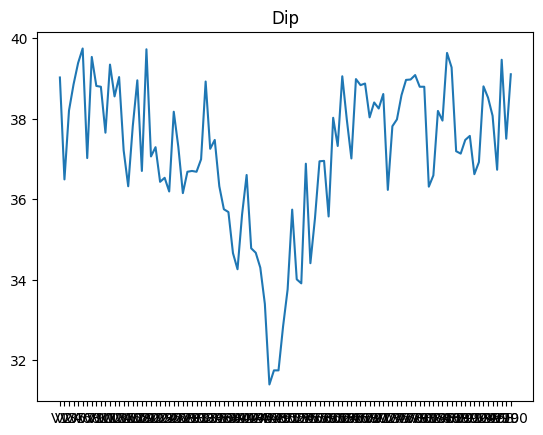

In [84]:
#plotting the graph
mat.plot(inp.iloc[0,:])
mat.title("Dip")

Text(0.5, 1.0, 'Peak')

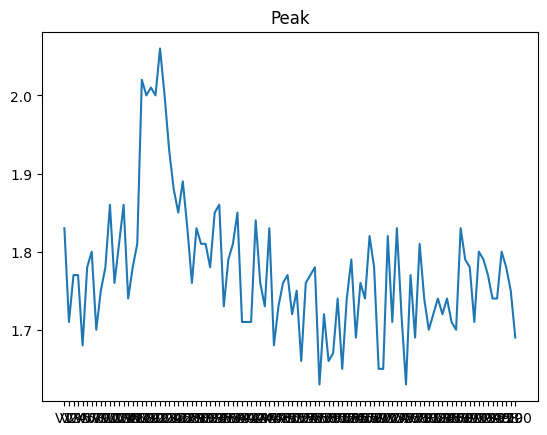

In [85]:
mat.plot(inp.iloc[1,:])
mat.title("Peak")

In [86]:
ss=StandardScaler()
inp=ss.fit_transform(inp)

In [87]:
inp

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [88]:
inp_train, inp_test, out_train, out_test=tts(inp,out,train_size=0.99,random_state=42)

In [89]:
inp_train.shape, inp_test.shape, out_train.shape, out_test.shape

((1199, 100), (13, 100), (1199,), (13,))

In [90]:
from sklearn.linear_model import LogisticRegression as lr

In [91]:
model=lr()
model.fit(inp_train,out_train)

LogisticRegression()

In [92]:
out_pred=model.predict(inp_test)

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
print(confusion_matrix(out_test, out_pred))

[[5 0]
 [2 6]]


In [95]:
print(classification_report(out_test, out_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.75      0.86         8

    accuracy                           0.85        13
   macro avg       0.86      0.88      0.85        13
weighted avg       0.89      0.85      0.85        13



In [96]:
#takinga new sample
inp_new=dip_peak.sample(1)
inp_new.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [97]:
inp_new=inp_new.drop(['Class'],axis=1)

In [98]:
inp_new=ss.fit_transform(inp_new)

In [99]:
out__newpred=model.predict(inp_new)
out__newpred

array([1])

In [100]:
model.predict_proba(inp_new)

array([[0.49563839, 0.50436161]])